<a href="https://colab.research.google.com/github/priyanshipathakk/coffee_sales_data/blob/main/Analyzing_sales_of_coffee_in_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [29]:
df = pd.read_csv('/content/processed_coffee_data.csv')

In [30]:
# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [31]:
print('Dataset Information -')
df.info()

Dataset Information -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [14]:
# Convert date and datetime columns to datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date'])
print("Data after cleaning and feature extraction")
# Filling nan values with cash payment
df['card'] = df['card'].fillna('cash')

# Extract time-based features for EDA
df['hour'] = df['datetime'].dt.hour
df['month'] = df['datetime'].dt.month_name()
df['day_of_week'] = df['datetime'].dt.dayofweek
df['year'] = df['datetime'].dt.year
display(df.head())

Data after cleaning and feature extraction


,date,datetime,cash_type,card,money,coffee_name,hour,month,day_of_week,year
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10,March,4,2024
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,March,4,2024
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12,March,4,2024
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13,March,4,2024
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13,March,4,2024


Most Popular Coffee Types:

coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


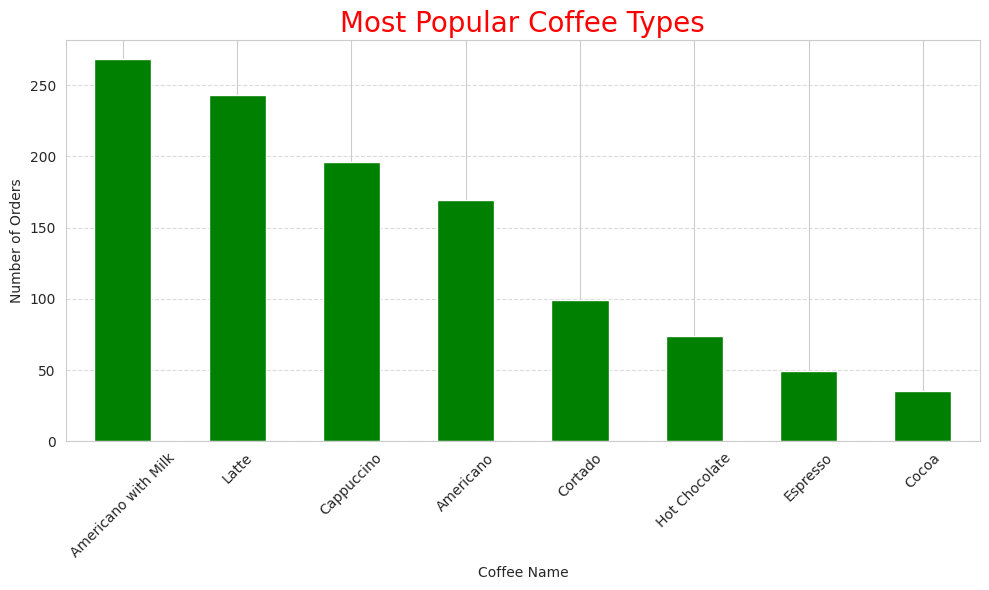

In [15]:
 import matplotlib.pyplot as plt

# Count the number of times each coffee type appears
coffee_counts = df['coffee_name'].value_counts()

# Print the most popular coffee types
print("Most Popular Coffee Types:\n")
print(coffee_counts)

# Plotting the bar chart
plt.figure(figsize=(10,6))
coffee_counts.plot(kind='bar', color='green')
plt.title('Most Popular Coffee Types', fontsize = 20 , color = 'red')
plt.xlabel('Coffee Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

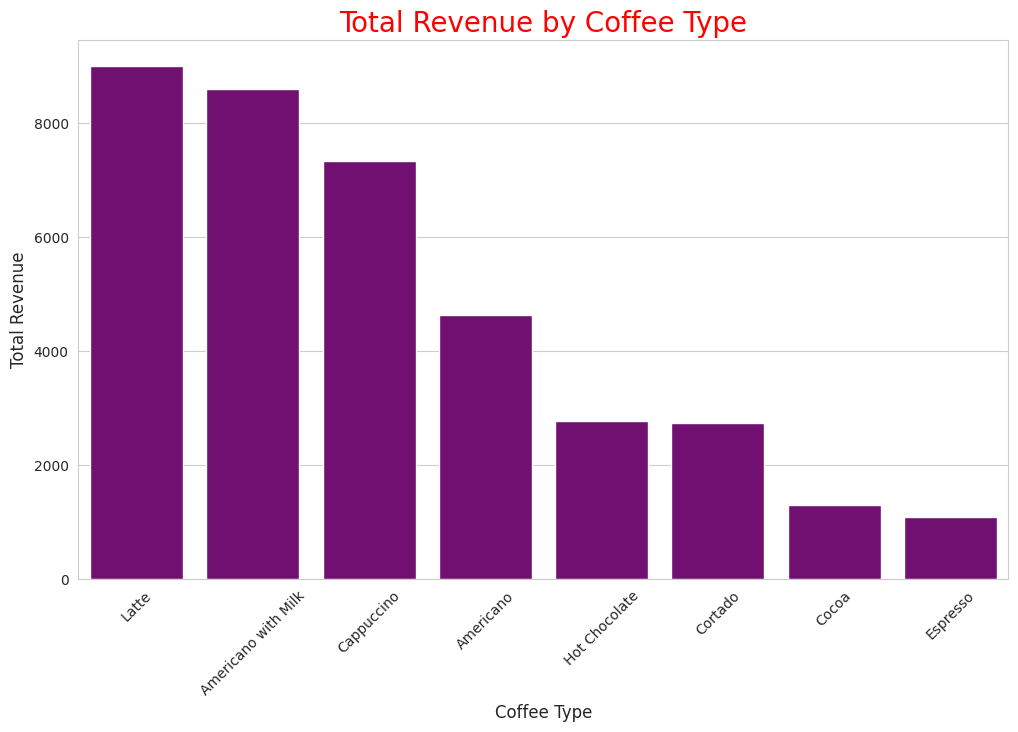

In [16]:
revenue_by_coffee = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x=revenue_by_coffee.index, y=revenue_by_coffee.values, color='purple')
plt.title('Total Revenue by Coffee Type', fontsize=20, color = 'red')
plt.xlabel('Coffee Type', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.show()

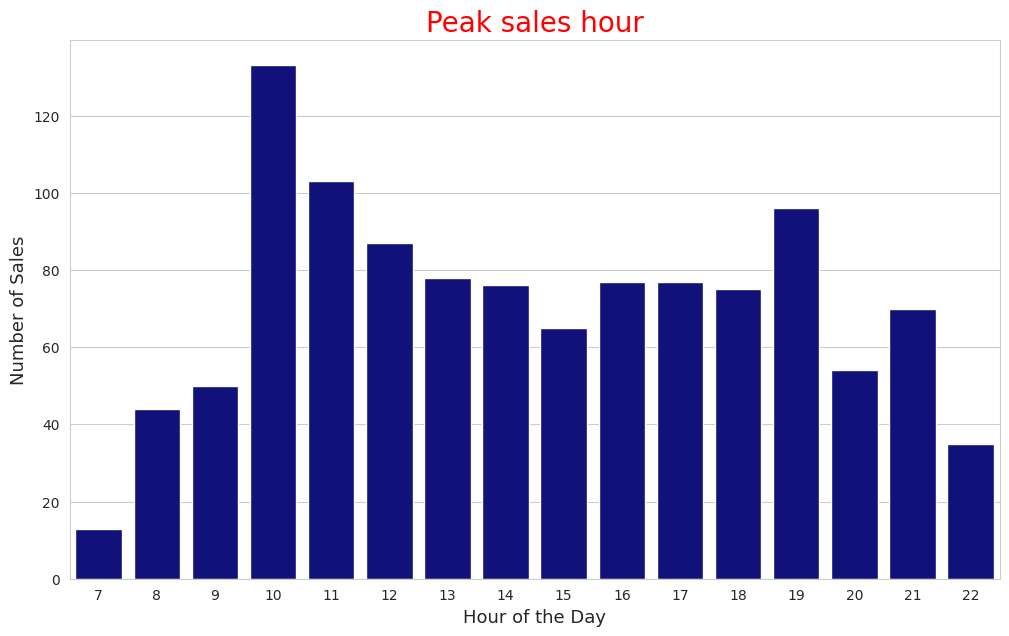

In [17]:
plt.figure(figsize=(12, 7))
sns.countplot(x='hour', data=df, color='darkblue')
plt.title('Peak sales hour', fontsize=20 , color = 'red')
plt.xlabel('Hour of the Day', fontsize=13)
plt.ylabel('Number of Sales', fontsize=13)
plt.show()

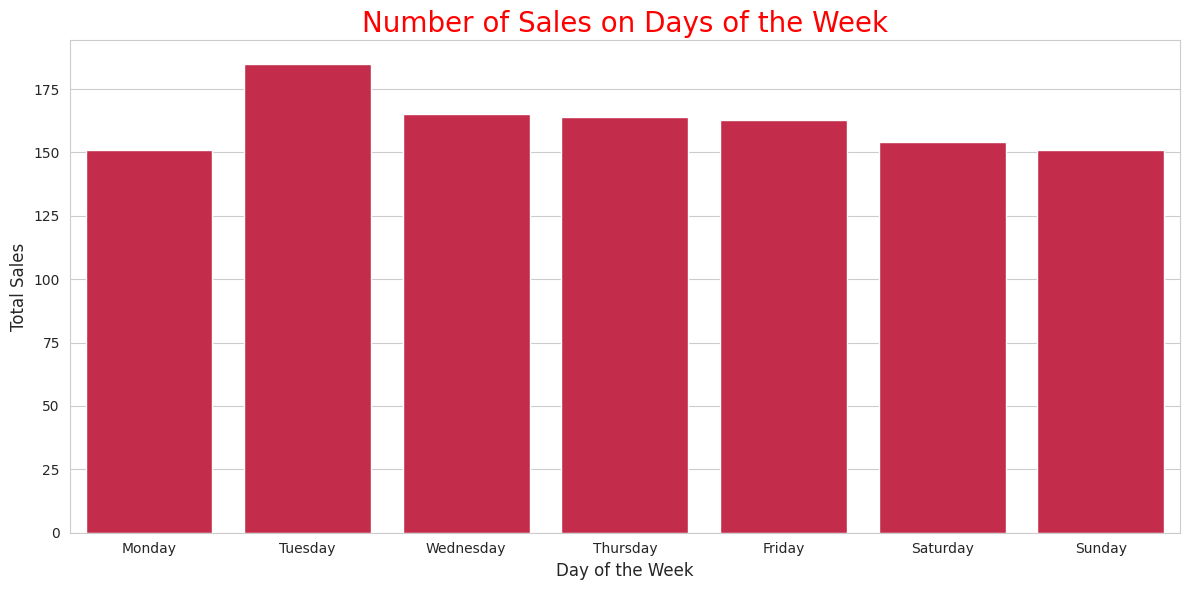

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

df['day_of_week'] = df['datetime'].dt.day_name()

# Setting weekdays
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, order=days_order, color='crimson')
plt.title('Number of Sales on Days of the Week', fontsize=20 , color = 'red')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


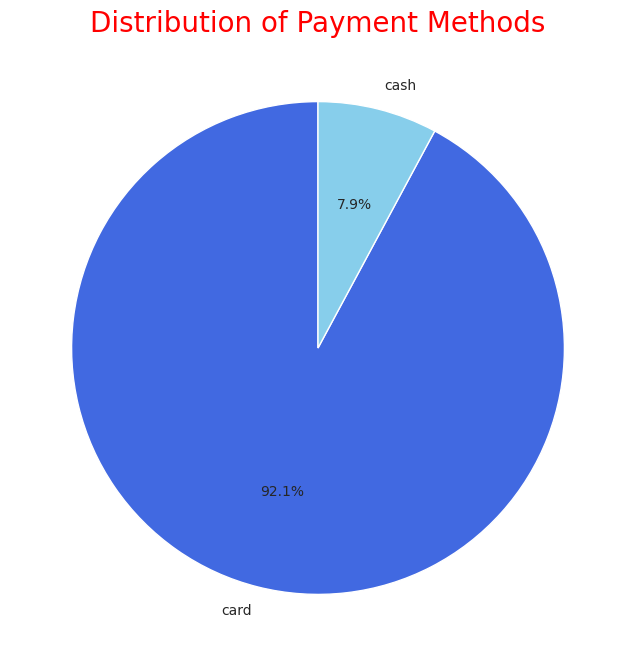

In [19]:
payment_counts = df['cash_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=['royalblue', 'skyblue'])
plt.title('Distribution of Payment Methods', fontsize=20 , color = 'red')

plt.show()

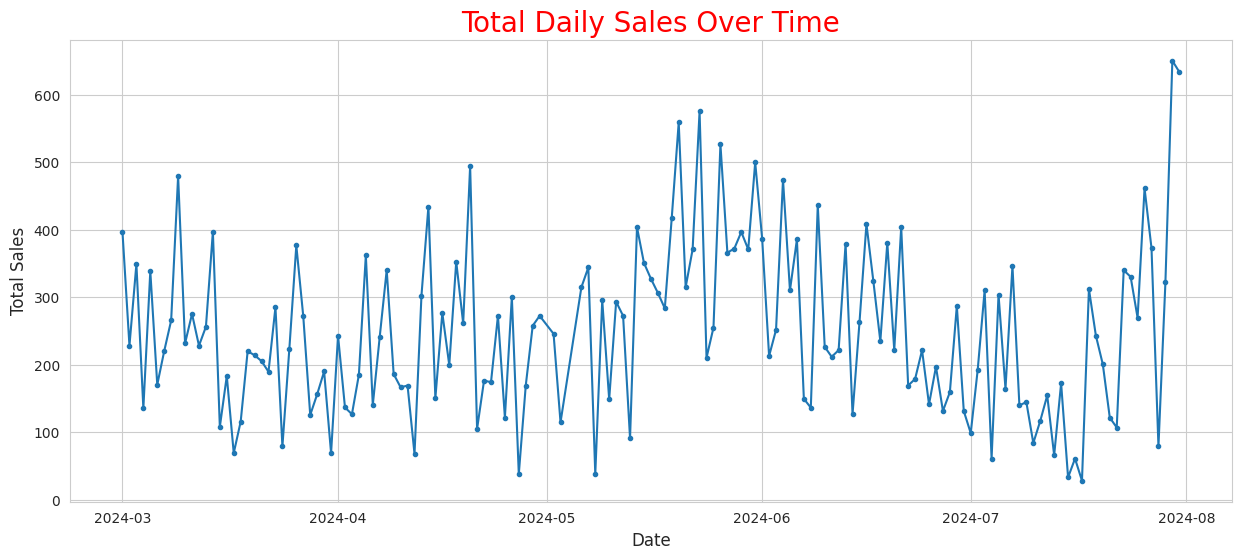

In [20]:
daily_sales = df.groupby('date')['money'].sum().reset_index()

plt.figure(figsize=(15,6))
plt.plot(daily_sales['date'], daily_sales['money'], marker='.', linestyle='-')
plt.title('Total Daily Sales Over Time', fontsize=20 , color = 'red')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.show()

In [21]:
# Filter out cash payments for customer analysis
customer_df = df[df['card'] != 'Cash Payment']

# Top 10 customers by purchase frequency
top_customers_by_freq = customer_df['card'].value_counts().nlargest(10)

# Top 10 customers by total spending
top_customers_by_spent = customer_df.groupby('card')['money'].sum().nlargest(10)

print("Top 10 Customers by Purchase Frequency:")
display(top_customers_by_freq)

print("\nTop 10 Customers by Total Spending:")
display(top_customers_by_spent)

Top 10 Customers by Purchase Frequency:


,count
card,
cash,89
ANON-0000-0000-0012,88
ANON-0000-0000-0009,63
ANON-0000-0000-0097,27
ANON-0000-0000-0003,23
ANON-0000-0000-0040,22
ANON-0000-0000-0141,17
ANON-0000-0000-0001,17
ANON-0000-0000-0024,12



Top 10 Customers by Total Spending:


,money
card,
cash,3186.00
ANON-0000-0000-0012,2593.18
ANON-0000-0000-0009,2212.70
ANON-0000-0000-0097,882.22
ANON-0000-0000-0040,706.36
ANON-0000-0000-0003,651.96
ANON-0000-0000-0001,646.14
ANON-0000-0000-0141,474.64
ANON-0000-0000-0180,442.84


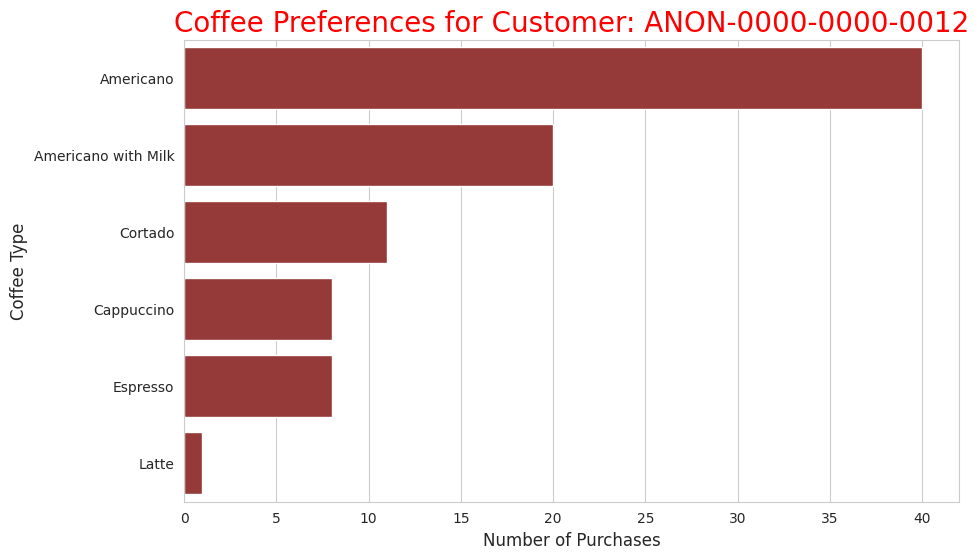

In [22]:
# Get the ID of the top customer
top_customer_id = top_customers_by_freq.index[1]

# Filter data for this customer
top_customer_data = customer_df[customer_df['card'] == top_customer_id]

plt.figure(figsize=(10, 6))
sns.countplot(y='coffee_name', data=top_customer_data, color = 'brown', order=top_customer_data['coffee_name'].value_counts().index)
plt.title(f'Coffee Preferences for Customer: {top_customer_id}', fontsize=20 , color = 'red')
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Coffee Type', fontsize=12)
plt.show()

In [23]:
# Prepare data for Prophet
prophet_df = df.groupby('date')['money'].sum().reset_index()
prophet_df.columns = ['ds', 'y']

print("Data prepared for Prophet:")
display(prophet_df.head())

Data prepared for Prophet:


,ds,y
0,2024-03-01,396.3
1,2024-03-02,228.1
2,2024-03-03,349.1
3,2024-03-04,135.2
4,2024-03-05,338.5


In [24]:
from prophet import Prophet

# Initialize and fit the model
model = Prophet(weekly_seasonality=True, daily_seasonality=False)
model.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl0hanlr/qltr8xbu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvl0hanlr/40pbr0oi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96384', 'data', 'file=/tmp/tmpvl0hanlr/qltr8xbu.json', 'init=/tmp/tmpvl0hanlr/40pbr0oi.json', 'output', 'file=/tmp/tmpvl0hanlr/prophet_modelp9xpk8d9/prophet_model-20250804161522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
# Future dataframe for the next 30 days
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Display the last few rows of the forecast
print("Forecast for the next 30 days - ")
display(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Forecast for the next 30 days - 


,ds,yhat,yhat_lower,yhat_upper
175,2024-08-26,244.162933,88.243446,406.754901
176,2024-08-27,295.107980,127.688967,454.689739
177,2024-08-28,271.771502,112.004773,439.500343
178,2024-08-29,279.177963,124.826240,439.491336
179,2024-08-30,264.505193,118.192658,424.295107


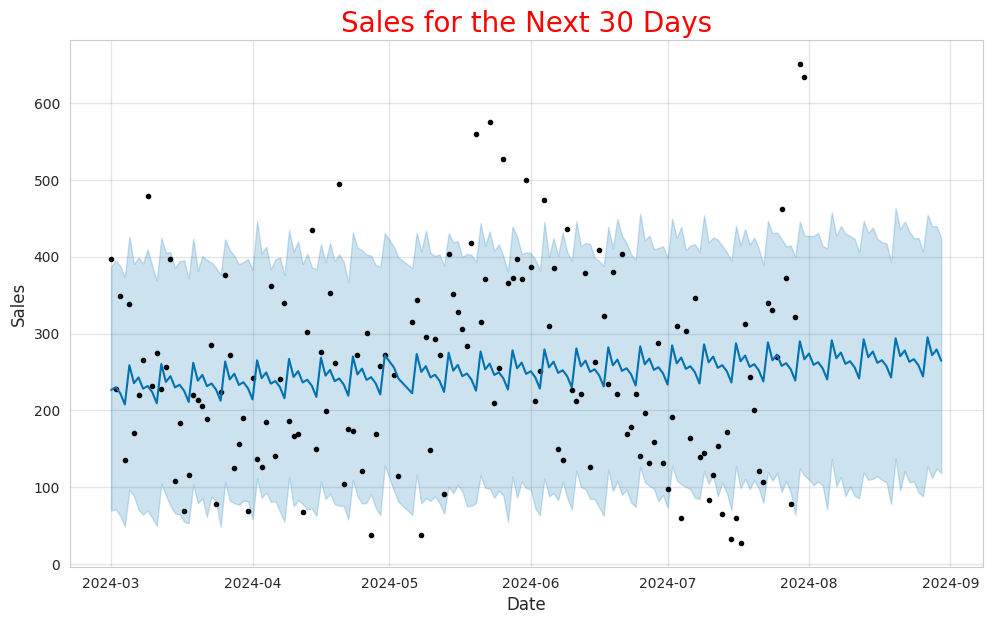

In [26]:
fig1 = model.plot(forecast)
plt.title('Sales for the Next 30 Days', fontsize=20 , color = 'red')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.show()

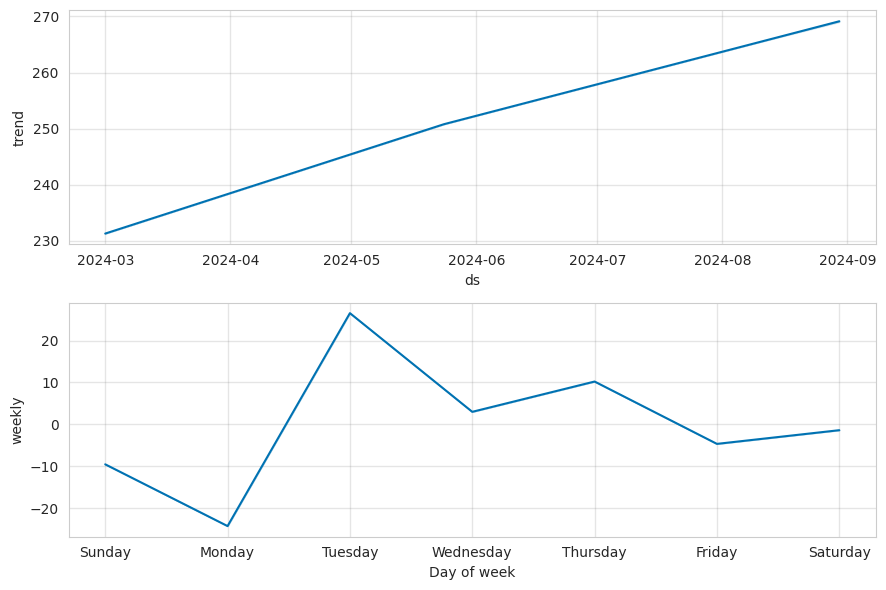

In [27]:

fig2 = model.plot_components(forecast)
plt.show()

In [28]:
# Get the last date in the original dataset
last_date = df['date'].max()

# Forecast for the next day
next_day_forecast = forecast[forecast['ds'] > last_date].iloc[0]
print(f"Predicted Sales for Next Day ({next_day_forecast['ds'].date()}): {next_day_forecast['yhat']:.2f}")

# Forecast for the next week (sum of next 7 days)
next_week_forecast = forecast[forecast['ds'] > last_date].head(7)['yhat'].sum()
print(f"\nPredicted Sales for the Next Week: {next_week_forecast:.2f}")

# Forecast for the next month (sum of next 30 days)
next_month_forecast = forecast[forecast['ds'] > last_date].head(30)['yhat'].sum()
print(f"Predicted Sales for the Next Month: {next_month_forecast:.2f}")

Predicted Sales for Next Day (2024-08-01): 273.94

Predicted Sales for the Next Week: 1849.93
Predicted Sales for the Next Month: 7998.43
